## An Investigation of Particulate Matter 2.5 and  Air Pollutants and their  impact in DMV During the COVID-19 Pandemic 




## Data Sciecne Workflow 

### Part I 

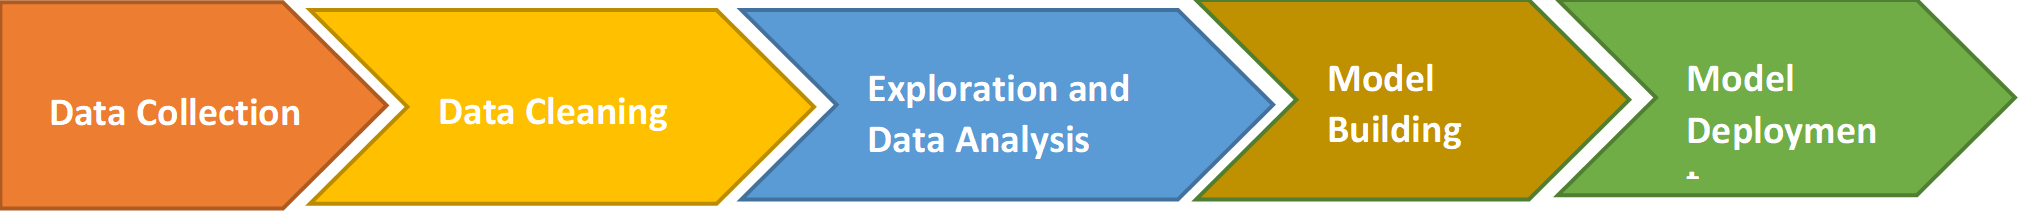


####  Dimention Reduction :

 Data Reduction improves the interpretation of the parameters of the machine learning model by removing irrelevant data. 
              
##### Attribute Subset Selection Method

     Initially the dataset containing 879531 Columns and 29 Rows were Collected from Environmental  
  Protection Agency (EPA) was collected. Based on the data science process , stage 3, The large data set has many attributes 
  some of which are irrelevant to data mining or some are redundant. The attribute subset selection reduces the volume of data 
  by eliminating the redundant and irrelevant attribute.  
 
       

In [5]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import linear_model
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
data = pd.read_csv('DMV10043.csv',header= 0)

In [7]:
data.head() # Partial view of the data 

,Ozone_ Contn,NO2_Contn,CO_ Concn,Temp_ Avg,SO2 _Contn,PM2.5_Contn,deathIncrease
0,0.014,21.7,0.1,36,17.0,25.0,39
1,0.025,19.0,0.3,80,14.0,13.0,26
2,0.049,24.9,0.4,64,19.0,24.0,35
3,0.042,22.1,0.1,80,18.0,21.0,26
4,0.027,28.6,0.3,76,34.0,37.0,31


In [8]:
data.shape

(387, 7)

In [9]:
data.head()

,Ozone_ Contn,NO2_Contn,CO_ Concn,Temp_ Avg,SO2 _Contn,PM2.5_Contn,deathIncrease
0,0.014,21.7,0.1,36,17.0,25.0,39
1,0.025,19.0,0.3,80,14.0,13.0,26
2,0.049,24.9,0.4,64,19.0,24.0,35
3,0.042,22.1,0.1,80,18.0,21.0,26
4,0.027,28.6,0.3,76,34.0,37.0,31


In [10]:
 data.head()

,Ozone_ Contn,NO2_Contn,CO_ Concn,Temp_ Avg,SO2 _Contn,PM2.5_Contn,deathIncrease
0,0.014,21.7,0.1,36,17.0,25.0,39
1,0.025,19.0,0.3,80,14.0,13.0,26
2,0.049,24.9,0.4,64,19.0,24.0,35
3,0.042,22.1,0.1,80,18.0,21.0,26
4,0.027,28.6,0.3,76,34.0,37.0,31


In [11]:
data.columns   # Unifying the datattypes - to integer

Index([' Ozone_ Contn', ' NO2_Contn', ' CO_ Concn', 'Temp_ Avg ', 'SO2 _Contn',
       ' PM2.5_Contn', 'deathIncrease'],
      dtype='object')

In [12]:
x_data = data[[' Ozone_ Contn', ' NO2_Contn', ' CO_ Concn', 'Temp_ Avg ', 'SO2 _Contn',
       ' PM2.5_Contn', 'deathIncrease']].astype(int)
x_data.head()

,Ozone_ Contn,NO2_Contn,CO_ Concn,Temp_ Avg,SO2 _Contn,PM2.5_Contn,deathIncrease
0,0,21,0,36,17,25,39
1,0,19,0,80,14,13,26
2,0,24,0,64,19,24,35
3,0,22,0,80,18,21,26
4,0,28,0,76,34,37,31


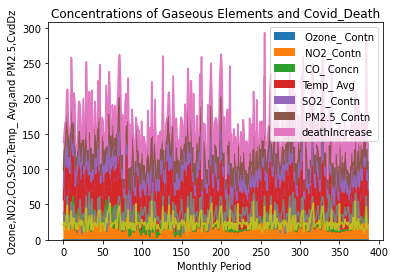

In [47]:
x_data.plot.area()                               # Partial View of all the  Concentrationd/month 

plt.xlabel("Monthly Period ")
plt.ylabel("Ozone,NO2,CO,SO2,Temp_ Avg,and PM2.5,CvdDz")
plt.title ("Concentrations of Gaseous Elements and Covid_Death")
plt.plot(x)
plt.plot(y)

In [14]:
data[' PM2.5_Contn']=data[' PM2.5_Contn'].astype(int)    


In [15]:
x_data.head()

,Ozone_ Contn,NO2_Contn,CO_ Concn,Temp_ Avg,SO2 _Contn,PM2.5_Contn,deathIncrease
0,0,21,0,36,17,25,39
1,0,19,0,80,14,13,26
2,0,24,0,64,19,24,35
3,0,22,0,80,18,21,26
4,0,28,0,76,34,37,31


In [16]:
alldata = x_data.describe()
alldata

,Ozone_ Contn,NO2_Contn,CO_ Concn,Temp_ Avg,SO2 _Contn,PM2.5_Contn,deathIncrease
count,387.0,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,0.0,23.648579,0.015504,54.891473,21.968992,24.000000,35.883721
std,0.0,10.670793,0.123705,15.621448,8.897463,9.904466,13.564829
min,0.0,4.000000,0.000000,18.000000,12.000000,10.000000,9.000000
25%,0.0,15.000000,0.000000,41.000000,15.000000,16.000000,26.000000
50%,0.0,21.000000,0.000000,53.000000,19.000000,23.000000,35.000000
75%,0.0,30.000000,0.000000,68.000000,27.000000,26.000000,43.000000
max,0.0,61.000000,1.000000,83.000000,54.000000,55.000000,67.000000


In [17]:
y_data = data[[' PM2.5_Contn', 'deathIncrease']]     # partial view of PM2.5 and Covid death.
y_data

,PM2.5_Contn,deathIncrease
0,25,39
1,13,26
2,24,35
3,21,26
4,37,31
...,...,...
382,14,24
383,14,24
384,47,62
385,16,29


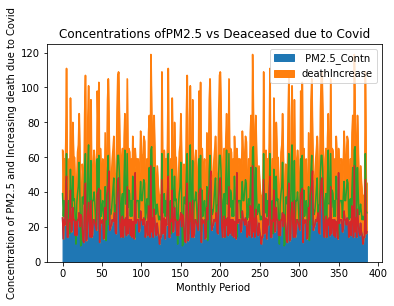

In [46]:
y_data.plot.area()
plt.xlabel("Monthly Period ")
plt.ylabel("Concentration of PM2.5 and Increasing death due to Covid")
plt.title("Concentrations ofPM2.5 vs Deaceased due to Covid")
plt.plot(x)
plt.plot(y)

In [19]:
plt1= data[['deathIncrease']]   # Partial View of Covid Deaths 

In [20]:
plt1.head(3)

,deathIncrease
0,39
1,26
2,35


In [21]:
x_data.head()

,Ozone_ Contn,NO2_Contn,CO_ Concn,Temp_ Avg,SO2 _Contn,PM2.5_Contn,deathIncrease
0,0,21,0,36,17,25,39
1,0,19,0,80,14,13,26
2,0,24,0,64,19,24,35
3,0,22,0,80,18,21,26
4,0,28,0,76,34,37,31


In [22]:
plt2 =x_data[[' PM2.5_Contn']]  # Partial View of PM2.5 Concentrations

Text(0.5, 1.0, 'Monthly Concentrations of PM 2.5 ')

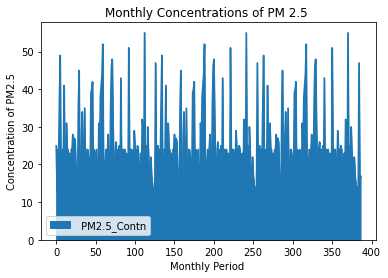

In [23]:
plt2.plot.area()
plt.xlabel("Monthly Period ")
plt.ylabel("Concentration of PM2.5")
plt.title("Monthly Concentrations of PM 2.5 ")
#plt.plot(x)
#plt.plot(y)

In [24]:
x=plt1
y=plt2

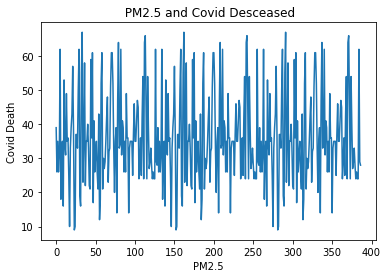

In [25]:
plt.xlabel("PM2.5")
plt.ylabel("Covid Death")
plt.title(" PM2.5 and Covid Desceased")
plt.plot(x)
#plt.plot(y)

In [26]:
x_data.head()    # Partial View of  the datastes 

,Ozone_ Contn,NO2_Contn,CO_ Concn,Temp_ Avg,SO2 _Contn,PM2.5_Contn,deathIncrease
0,0,21,0,36,17,25,39
1,0,19,0,80,14,13,26
2,0,24,0,64,19,24,35
3,0,22,0,80,18,21,26
4,0,28,0,76,34,37,31


In [27]:
x_data.columns

Index([' Ozone_ Contn', ' NO2_Contn', ' CO_ Concn', 'Temp_ Avg ', 'SO2 _Contn',
       ' PM2.5_Contn', 'deathIncrease'],
      dtype='object')

In [28]:
N2S2 = x_data[[' NO2_Contn', 'SO2 _Contn']]
N2S2.head(3)                                          # Partial View of Nitrogen and Sulpher Concentrations

,NO2_Contn,SO2 _Contn
0,21,17
1,19,14
2,24,19


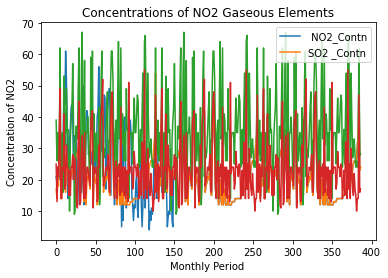

In [29]:
N2S2.plot.line()
plt.xlabel("Monthly Period ")
plt.ylabel("Concentration of NO2")
plt.title("Concentrations of NO2 Gaseous Elements")
plt.plot(x)
plt.plot(y)

In [30]:
z=N2S2         
z.head(3) # Concentration of N02 and S02 

,NO2_Contn,SO2 _Contn
0,21,17
1,19,14
2,24,19


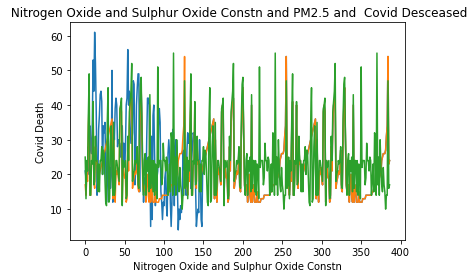

In [31]:
z=N2S2    # Concentration of N02 and S02 vs Covid Death
plt.xlabel("Nitrogen Oxide and Sulphur Oxide Constn")
plt.ylabel("Covid Death")
plt.title(" Nitrogen Oxide and Sulphur Oxide Constn and PM2.5 and  Covid Desceased")
plt.plot(z)
plt.plot(y)

In [32]:
OZCO=x_data[[' Ozone_ Contn',' CO_ Concn']]
OZCO.head (3)                                      # Partial View of Ozone and Carbon Monoxide Concentrations

,Ozone_ Contn,CO_ Concn
0,0,0
1,0,0
2,0,0


In [33]:
w=OZCO
w.head(3)

,Ozone_ Contn,CO_ Concn
0,0,0
1,0,0
2,0,0


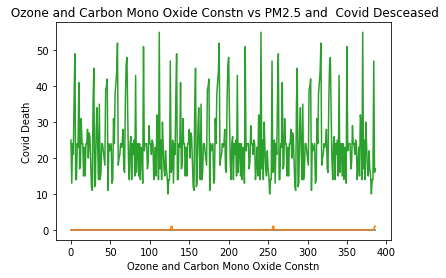

In [34]:
w=OZCO                         # Partial View of all  Ozone and Carbon Mono Oxide Concentrationd/month
plt.xlabel("Ozone and Carbon Mono Oxide Constn")
plt.ylabel("Covid Death")
plt.title(" Ozone and Carbon Mono Oxide Constn vs PM2.5 and  Covid Desceased")
plt.plot(w)
plt.plot(y)

In [35]:
x_data.head()

,Ozone_ Contn,NO2_Contn,CO_ Concn,Temp_ Avg,SO2 _Contn,PM2.5_Contn,deathIncrease
0,0,21,0,36,17,25,39
1,0,19,0,80,14,13,26
2,0,24,0,64,19,24,35
3,0,22,0,80,18,21,26
4,0,28,0,76,34,37,31


In [36]:
 x_data.columns

Index([' Ozone_ Contn', ' NO2_Contn', ' CO_ Concn', 'Temp_ Avg ', 'SO2 _Contn',
       ' PM2.5_Contn', 'deathIncrease'],
      dtype='object')

In [37]:
Temp =x_data[['Temp_ Avg ', ' PM2.5_Contn', 'deathIncrease']] 
Temp.head(3)                                                           # Partial View of temp , PM2.5  concn and Covid death 

,Temp_ Avg,PM2.5_Contn,deathIncrease
0,36,25,39
1,80,13,26
2,64,24,35


Text(0.5, 1.0, ' Temperature, PM2.5 and Covid Death relation ')

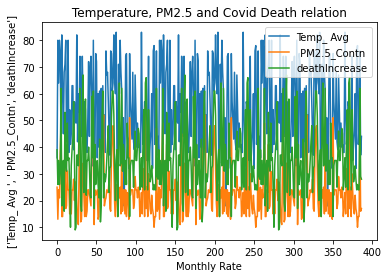

In [38]:
Temp.plot() # Temperature, PM2.5 and Covid Death relation 

plt.xlabel("Monthly Rate")
plt.ylabel(['Temp_ Avg ', ' PM2.5_Contn', 'deathIncrease'])
plt.title(" Temperature, PM2.5 and Covid Death relation ")


In [39]:
alldata = x_data.describe()                # This is a statistical details of the sample datatsets and different outputs
                                           # to show what the data looks like 
alldata

,Ozone_ Contn,NO2_Contn,CO_ Concn,Temp_ Avg,SO2 _Contn,PM2.5_Contn,deathIncrease
count,387.0,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,0.0,23.648579,0.015504,54.891473,21.968992,24.000000,35.883721
std,0.0,10.670793,0.123705,15.621448,8.897463,9.904466,13.564829
min,0.0,4.000000,0.000000,18.000000,12.000000,10.000000,9.000000
25%,0.0,15.000000,0.000000,41.000000,15.000000,16.000000,26.000000
50%,0.0,21.000000,0.000000,53.000000,19.000000,23.000000,35.000000
75%,0.0,30.000000,0.000000,68.000000,27.000000,26.000000,43.000000
max,0.0,61.000000,1.000000,83.000000,54.000000,55.000000,67.000000


In [45]:
corr=alldata.corr()
corr

AttributeError: 'AxesSubplot' object has no attribute 'corr'

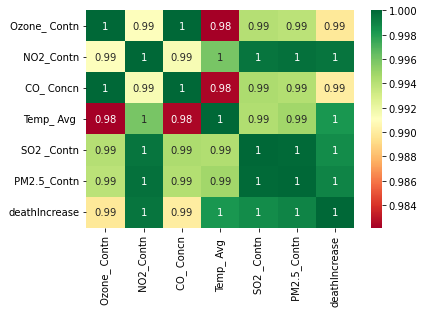

In [41]:
alldata =sns.heatmap(corr,annot=True,cmap="RdYlGn") 
# The heat map depicting the relationship of the gaseous elements. 
# From the graph, we can see that as one read from bottom to top -
# bold green , shows strong correlation
# N02 and CO have srtong correlation with PM2.5 and Covid death. 

In [42]:
#reg = linear_model.LinearRegression()
#reg.fit(x_data[['PM2.5_Contn']],x_data.deathIncrease)

In [43]:
X= x_data[[' PM2.5_Contn']] 

In [44]:
#X_train.shape

In [787]:
y= x_data['deathIncrease']

In [788]:
y_train.shape

(103,)

In [794]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [791]:
reg = LinearRegression()
reg.fit(X_test,y_test)

LinearRegression()

In [804]:
reg.coef_

array([0.50806747])

In [793]:
reg.intercept_

24.36101943527686

In [801]:
from sklearn import preprocessing
from sklearn.model_selection import KFold

   ## Next Step 
   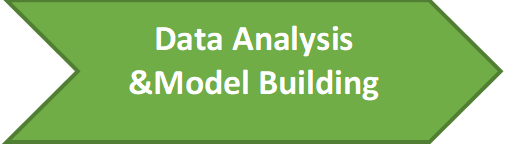


In [ ]:
REG= reg.
